In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Tratamento dos dados

In [2]:
df = pd.DataFrame()
df_order = pd.read_csv('olist_order_reviews_dataset.csv')
df_product = pd.read_csv('olist_products_dataset.csv')
df_order_product = pd.read_csv('olist_order_items_dataset.csv')

In [5]:
df_final1 = df_product.merge(df_order_product)
df_final2 = df_final1.merge(df_order)

In [6]:
df_cleaned = df_final2.dropna()
df_cleaned=df_cleaned.drop(columns=['product_id', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'order_id', 'seller_id', 'shipping_limit_date', 'review_id', 'review_creation_date', 'review_answer_timestamp'])

In [15]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

Tratamento dos resultados

In [2]:
df = pd.read_csv('ResultadosExperimentos.csv')
df_kmedoid = df.copy()
df_agglomerative = df.copy()

In [3]:
df_agglomerative = df_agglomerative[df_agglomerative['algoritmo'] == 'agglomerative']
df_kmedoid = df_kmedoid[df_kmedoid['algoritmo'] == 'kmedoid']

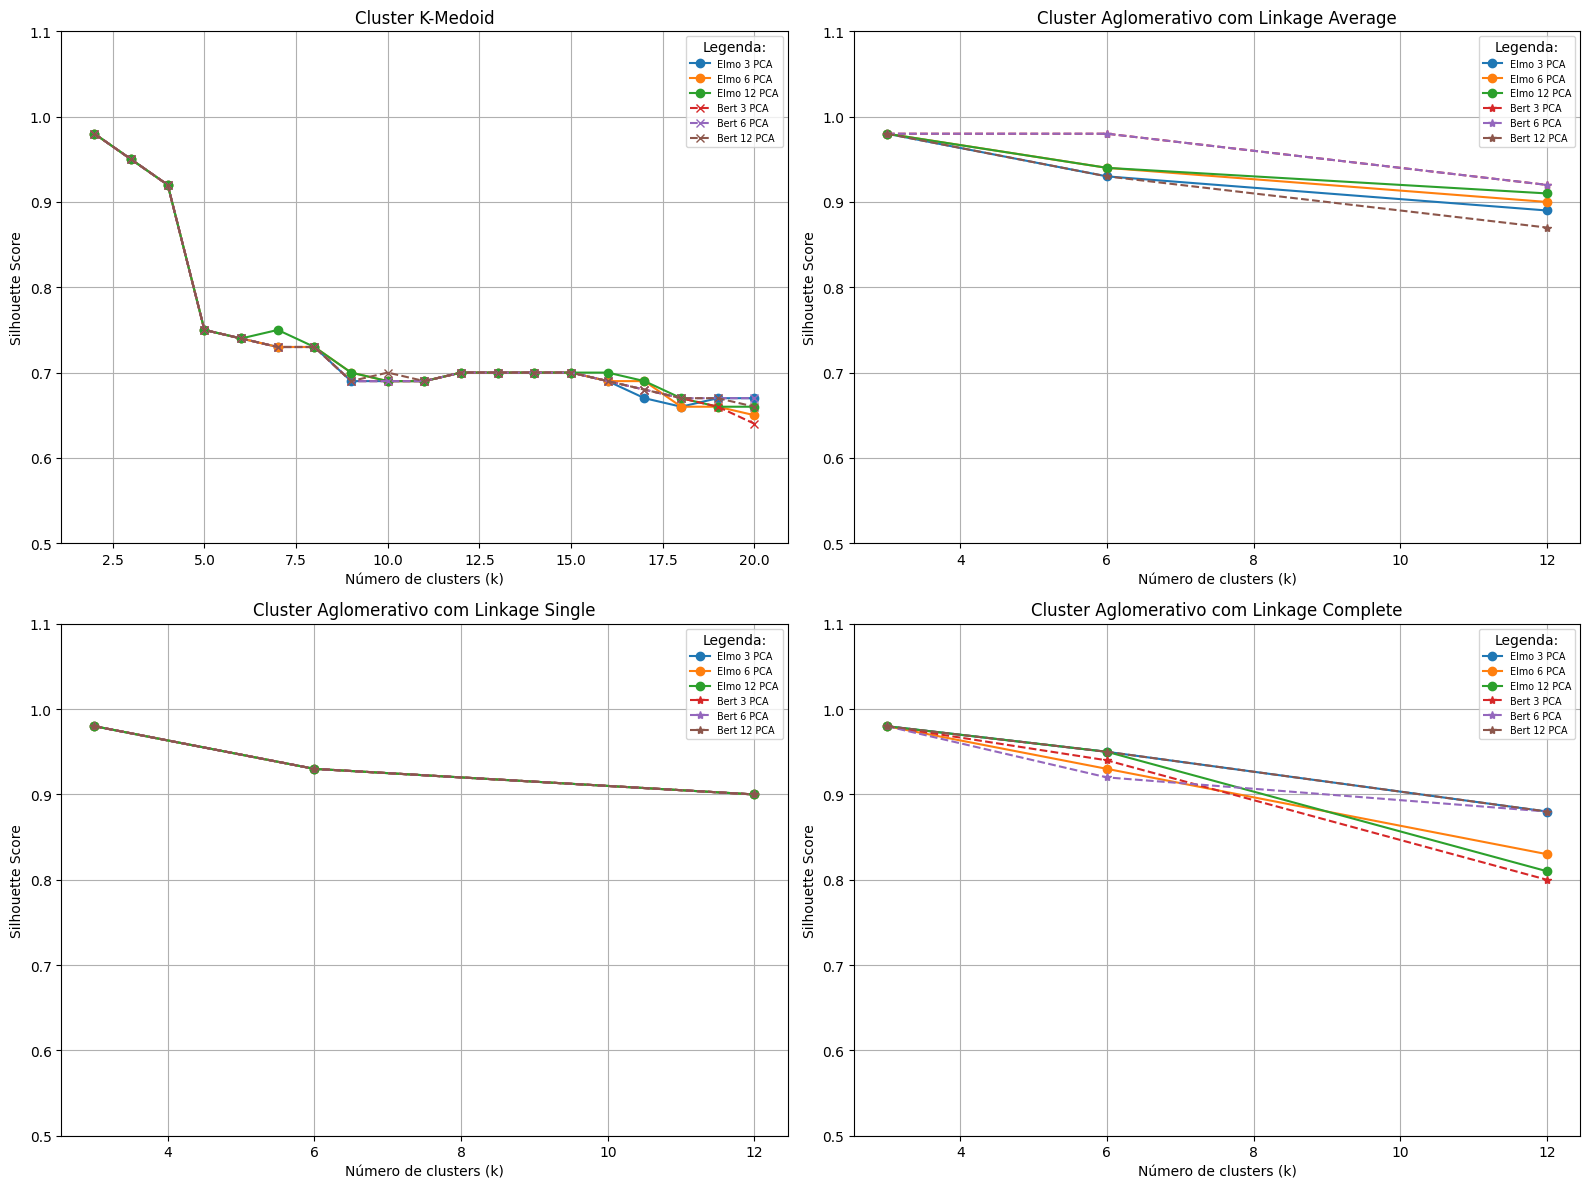

In [4]:
import matplotlib.pyplot as plt

# Filtrar os dados para Elmo e Bert
elmo_pca_kmed = df_kmedoid[df_kmedoid['slice'].str.contains("Elmo")]
bert_pca_kmed = df_kmedoid[df_kmedoid['slice'].str.contains("Bert")]

elmo_pca_agg = df_agglomerative[df_agglomerative['slice'].str.contains("Elmo")]
bert_pca_agg = df_agglomerative[df_agglomerative['slice'].str.contains("Bert")]

elmo_average = elmo_pca_agg[elmo_pca_agg['slice'].str.contains("average")]
bert_average = bert_pca_agg[bert_pca_agg['slice'].str.contains("average")]

elmo_single = elmo_pca_agg[elmo_pca_agg['slice'].str.contains("single")]
bert_single = bert_pca_agg[bert_pca_agg['slice'].str.contains("single")]

elmo_complete = elmo_pca_agg[elmo_pca_agg['slice'].str.contains("complete")]
bert_complete = bert_pca_agg[bert_pca_agg['slice'].str.contains("complete")]

# Definir os valores de k específicos
k_range = [3, 6, 12]

# Criar a figura e os eixos (2 linhas, 2 colunas)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: K-Medoids
axes[0, 0].set_title("Cluster K-Medoid")
for base_pca, group in elmo_pca_kmed.groupby('base_pca'):
    axes[0, 0].plot(group['param_K'], group['silhueta'], marker='o', label=f"Elmo {base_pca} PCA")
for base_pca, group in bert_pca_kmed.groupby('base_pca'):
    axes[0, 0].plot(group['param_K'], group['silhueta'], marker='x', linestyle='--', label=f"Bert {base_pca} PCA")
axes[0, 0].set_xlabel("Número de clusters (k)")
axes[0, 0].set_ylabel("Silhouette Score")
axes[0, 0].invert_yaxis()
axes[0, 0].set_ylim(0.5, 1.1)
axes[0, 0].legend(title='Legenda:', fontsize='x-small')  # Tamanho da legenda reduzido
axes[0, 0].grid(True)

# Gráfico 2: Agglomerative (average)
axes[0, 1].set_title("Cluster Aglomerativo com Linkage Average")
for base_pca, group in elmo_average.groupby('base_pca'):
    axes[0, 1].plot(k_range, group['silhueta'], marker='o', label=f"Elmo {base_pca} PCA")
for base_pca, group in bert_average.groupby('base_pca'):
    axes[0, 1].plot(k_range, group['silhueta'], marker='*', linestyle='--', label=f"Bert {base_pca} PCA")
axes[0, 1].set_xlabel("Número de clusters (k)")
axes[0, 1].set_ylabel("Silhouette Score")
axes[0, 1].invert_yaxis()
axes[0, 1].set_ylim(0.5, 1.1)
axes[0, 1].legend(title='Legenda:', fontsize='x-small')  # Tamanho da legenda reduzido
axes[0, 1].grid(True)

# Gráfico 3: Agglomerative (single)
axes[1, 0].set_title("Cluster Aglomerativo com Linkage Single")
for base_pca, group in elmo_single.groupby('base_pca'):
    axes[1, 0].plot(k_range, group['silhueta'], marker='o', label=f"Elmo {base_pca} PCA")
for base_pca, group in bert_single.groupby('base_pca'):
    axes[1, 0].plot(k_range, group['silhueta'], marker='*', linestyle='--', label=f"Bert {base_pca} PCA")
axes[1, 0].set_xlabel("Número de clusters (k)")
axes[1, 0].set_ylabel("Silhouette Score")
axes[1, 0].invert_yaxis()
axes[1, 0].set_ylim(0.5, 1.1)
axes[1, 0].legend(title='Legenda:', fontsize='x-small')  # Tamanho da legenda reduzido
axes[1, 0].grid(True)

# Gráfico 4: Agglomerative (complete)
axes[1, 1].set_title("Cluster Aglomerativo com Linkage Complete")
for base_pca, group in elmo_complete.groupby('base_pca'):
    axes[1, 1].plot(k_range, group['silhueta'], marker='o', label=f"Elmo {base_pca} PCA")
for base_pca, group in bert_complete.groupby('base_pca'):
    axes[1, 1].plot(k_range, group['silhueta'], marker='*', linestyle='--', label=f"Bert {base_pca} PCA")
axes[1, 1].set_xlabel("Número de clusters (k)")
axes[1, 1].set_ylabel("Silhouette Score")
axes[1, 1].invert_yaxis()
axes[1, 1].set_ylim(0.5, 1.1)
axes[1, 1].legend(title='Legenda:', fontsize='x-small')  # Tamanho da legenda reduzido
axes[1, 1].grid(True)

# Ajustar o layout para que os gráficos não se sobreponham
plt.tight_layout()

# Mostrar a figura com todos os gráficos
plt.show()
